### Variable Renewable Energy (VRE) assessment and forecast

## Research Question: 
1. How accurately can we predict the PV capacity factor using climate variables?
2. Which climate variables are most influential in determining PV capacity factor across different regions in France?

## Project objectives
<div class="alert alert-block alert-info">

- Assess the solar photovoltaic hourly production over in metropolitan France regions using climate data and capacity factor observations

- Predict the VRE power (capacity factor) ahead of time in the next few days/a week


## Motivation and Description
### Methodology Type:

- Using supervised learning since the task involves predicting a numerical target variable (PV capacity factor) based on known input variables (climate data)

- Utilizing and learning 2/3 methods of Machine Learning (starting from the easiest to more complex)


### Steps and Strategies:

#### Data Preprocessing:

1. Handle Missing Data: Replace or remove missing values (e.g., NaNs) in the dataset to ensure no errors during modeling.

2. Feature Engineering: Compute regional averages of climate variables (if necessary) and remove redundant or non-informative features (e.g., constant columns or zeros).

3. Scaling: Normalize or standardize the climate variable values to ensure all features have comparable scales.

#### Exploratory Data Analysis:

Analyze relationships between climate variables and the PV capacity factor using correlation matrices and scatter plots.
Perform feature importance analysis using initial linear regression models to identify potential key drivers.

#### Model Selection:

Start with simple models and progressively increase complexity to improve results:

- Baseline Model: Linear Regression with OLS between Climate Variables and Capacity Factor to establish a baseline performance.
- Advanced Models: Using Lasso Regression to find R2/ bagging Regressor, Feature Importances using MDI, Choose between the stacking regressor, AdaBoost regressor, and  voting regressor (compare between DecisionTree, Random Forest and Lasso in each regressor method)
- Neural Networks: 3. RNN -LTSM (If we have time)

## Feature Selection Models:
- Apply Lasso Regression to select the most significant features.
- Use mutual information and correlation matrix to rank the predictive power of each climate variable.

### Evaluation Methods:

- Train-Test Split: Divide the data into training and test sets (e.g., 80%-20%).
- Cross-Validation: Use k-fold cross-validation (e.g., 5-fold) to evaluate model robustness. --> Nested Cross Validation (bonus)

Metrics: Evaluate the models using:
- RMSE (Root Mean Squared Error): To quantify the difference between predicted and actual values.
- R2 (Coefficient of Determination): To assess how well the model explains the variance in the target variable.
- MAE (Mean Absolute Error): To capture prediction error robustness.

### Feature Importance and Interpretability:

- Very useful for tree-based models, use of feature importance scores to identify which climate variables influence PV capacity the most.
- Analyze results regionally to understand spatial variability.

## Complexity Management:

- Start simple (e.g. linear regression) and introduce complexity incrementally.
- Apply regularization techniques (L1 or L2 penalties) in linear models to reduce overfitting.
- Use hyperparameter tuning (e.g. grid search or Bayesian optimization) for tree-based models to balance model complexity with predictive performance.

## Final Model Validation:

Evaluate the best-performing model on the test set to assess generalizability.
Perform robustness checks: 
- Testing on subsets of regions to see if relationships hold consistently.
- Testing on unseen climate variables or time ranges (if data allows).

## Description of Data
- Inputs: 
1. Climate Variables (netcfd) corresponding to each region in France (surface downward radiation, surface temperature, surface density, surface specific humidity) --> polynomials degree 2

- Target Output: The data that we are going to try to predict
1. Capacity Factor(Monthly Capacity Factors)
2. Demand? *if we have time







</div>

### Dataset

- Observed monthly VRE capacity factors averaged over metropolitan France regions from 2014 to 2021
- Climate variables of your choice from a global reanalysis with an hourly sampling from 2010 to 2019

### First steps

- Choose from solar or wind power
- Read about solar/wind production assessment and forecast
- Estimate the hourly solar/wind production

### Reading the data

<>:8: SyntaxWarning: invalid escape sequence '\J'
<>:9: SyntaxWarning: invalid escape sequence '\J'
<>:8: SyntaxWarning: invalid escape sequence '\J'
<>:9: SyntaxWarning: invalid escape sequence '\J'
C:\Users\User\AppData\Local\Temp\ipykernel_25972\2755090336.py:8: SyntaxWarning: invalid escape sequence '\J'
  data_dir_energy = Path('\JODIE\MASTERS\Masters (S2)\InnoEnergy\Ecole Polytechnique\Semestre_1\Machine Learning for Climate Change and Energy\Project\data\energy_france')
C:\Users\User\AppData\Local\Temp\ipykernel_25972\2755090336.py:9: SyntaxWarning: invalid escape sequence '\J'
  data_dir_climate = Path('\JODIE\MASTERS\Masters (S2)\InnoEnergy\Ecole Polytechnique\Semestre_1\Machine Learning for Climate Change and Energy\Project\data\climate_france_2019')


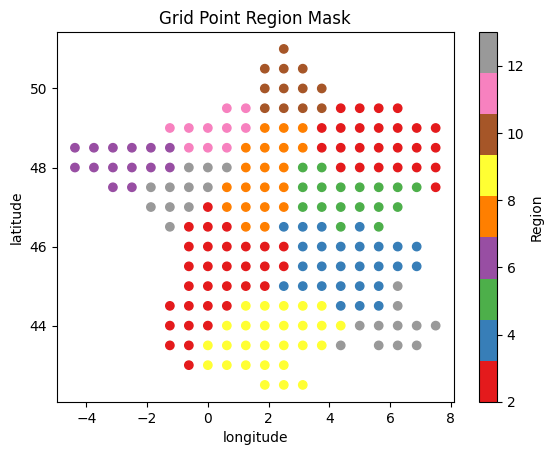

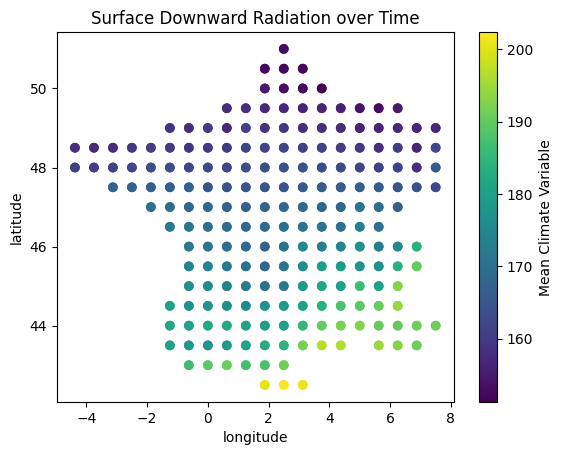

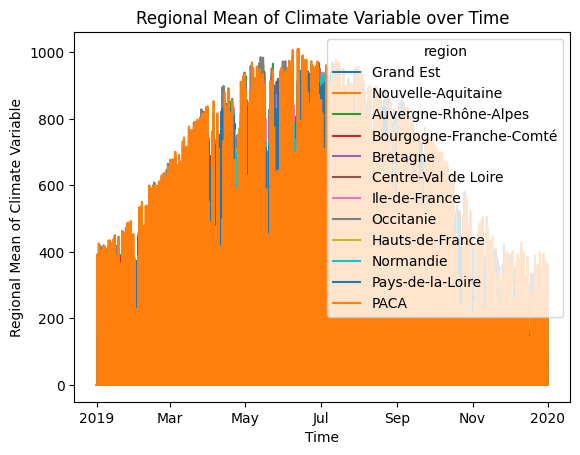

<Figure size 640x480 with 0 Axes>

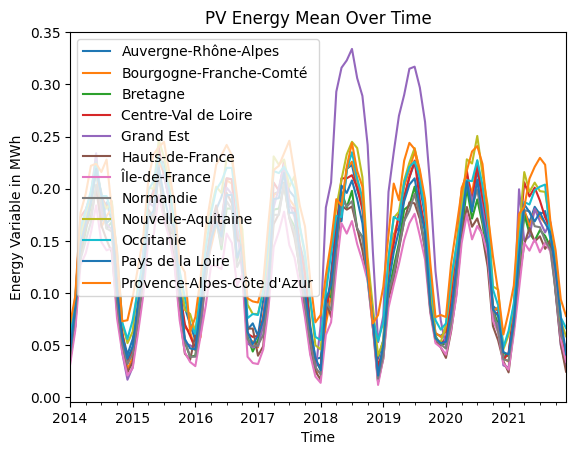

In [25]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np

# Directories where you saved the data
data_dir_energy = Path('\JODIE\MASTERS\Masters (S2)\InnoEnergy\Ecole Polytechnique\Semestre_1\Machine Learning for Climate Change and Energy\Project\data\energy_france')
data_dir_climate = Path('\JODIE\MASTERS\Masters (S2)\InnoEnergy\Ecole Polytechnique\Semestre_1\Machine Learning for Climate Change and Energy\Project\data\climate_france_2019')
                        
# Template filenames
filename_mask = 'mask_datagouv_french_regions_merra2_Nx_France.nc'
filename_climate = 'merra2_area_selection_output_{}_merra2_2019-2019.nc'
filename_energy = 'reseaux_energies_{}.csv'

# Set keyword arguments for pd.read_csv
kwargs_read_csv = dict(index_col=0, header=0, parse_dates=True)

# Read and plot grid point-region mask
filepath_mask = Path(data_dir_climate, filename_mask)
ds_mask = xr.load_dataset(filepath_mask)
da_mask = ds_mask['mask']
plt.figure()
plt.title('Grid Point Region Mask')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(da_mask['lon'], da_mask['lat'], c=da_mask, cmap='Set1')
plt.colorbar(label='Region')

# Read a climate variable and plot its mean over time
variable_name = 'surface_downward_radiation'
filename = filename_climate.format(variable_name)
filepath = Path(data_dir_climate, filename)
da_climate = xr.load_dataset(filepath)[variable_name]
plt.figure()
plt.title('Surface Downward Radiation over Time')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(da_mask['lon'], da_mask['lat'], c=da_climate.mean('time'))
sc_climate = plt.scatter(da_mask['lon'], da_mask['lat'], c=da_climate.mean('time'))
plt.colorbar(sc_climate, label='Mean Climate Variable')

# Compute regional mean of climate variable
da_climate_reg = da_climate.groupby(da_mask).mean().rename(mask='region')
da_climate_reg['region'] = ds_mask['region'].values

# Plot time series for the regional mean climate variable with 'region' as hue
plt.figure()
da_climate_reg.plot.line(x='time', hue='region')
plt.xlabel('Time')
plt.ylabel('Regional Mean of Climate Variable')
plt.title('Regional Mean of Climate Variable over Time')
plt.show()


# Plot energy variable time series
variable_name = 'capacityfactor_pv'
filename = filename_energy.format(variable_name)
filepath = Path(data_dir_energy, filename)
df_energy = pd.read_csv(filepath, index_col=0, header=0, parse_dates=True)
plt.figure()
df_energy.plot()
plt.title('PV Energy Mean Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Variable in MWh')

plt.show()

In [30]:
da_climate

<xarray.DataArray 'surface_downward_radiation' (time: 8760, stacked_dim: 205)> Size: 7MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 70kB 2019-01-01 ... 2019-12-31T23:00:00
    lat      (stacked_dim) float64 2kB 42.5 42.5 42.5 43.0 ... 50.5 50.5 51.0
    lon      (stacked_dim) float64 2kB 1.875 2.5 3.125 -0.625 ... 2.5 3.125 2.5
Dimensions without coordinates: stacked_dim
Attributes:
    long_name:       surface_incoming_shortwave_flux
    units:           Unknown
    fmissing_value:  1000000000000000.0
    standard_name:   surface_incoming_shortwave_flux
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]
    origname:        SWGDN
    fullnamepath:    /SWGDN
    height:          2.0

In [ ]:
# List of climate variables to process
climate_variables = [
    'surface_downward_radiation', 'surface_temperature', 
    'surface_specific_humidity', 'surface_density'
]

# Dictionary to store processed climate data
climate_data_by_region = {}

# Process each climate variable
for variable_name in climate_variables:
    # Read climate variable
    filename = filename_climate.format(surface_downward_radiation)
    filepath = Path(data_dir_climate, filename)
    da_climate = xr.load_dataset(filepath)[(surface_downward_radiation)]
e]
    
    # Compute regional mean based on the mask
    da_climate_reg = da_climate.groupby(da_mask).mean().rename(mask='region')
    
    # Convert to DataFrame and store
    df_climate = da_climate_reg.to_dataframe().reset_index()
    df_climate['variable'] = variable_name  # Add variable name for later identification
    if 'region' in climate_data_by_region:
        climate_data_by_region['region'] = pd.merge(
            climate_data_by_region['region'],
            df_climate,
            on=['time', 'region'],
            how='outer'
        )
    else:
        climate_data_by_region['region'] = df_climate

# Combine all climate data into a single DataFrame
df_climate_combined = pd.concat(climate_data_by_region.values(), ignore_index=True)

# Reshape climate data to have variables as columns
df_climate_pivot = df_climate_combined.pivot_table(
    index=['time', 'region'], columns='variable', values=variable_name
).reset_index()

# Process energy data: ensure it has a 'region' column matching the climate data
df_energy = df_energy.reset_index()  # Ensure time is a column
df_energy['region'] = df_energy['index']  # Assuming regions are stored in the index; modify as needed

# Merge energy data with climate data
df_combined = pd.merge(
    df_energy,
    df_climate_pivot,
    on=['time', 'region'],
    how='inner'
)

# Drop any missing values (optional, depending on your data)
df_combined.dropna(inplace=True)

# Display the combined DataFrame
print("Combined DataFrame for Climate and Energy Data:")
print(df_combined.head())


MergeError: Passing 'suffixes' which cause duplicate columns {'variable_x'} is not allowed.

The 'surface_downward_radiation' dataset contains non-zero values. Proceeding with analysis.
<xarray.DataArray 'surface_downward_radiation' (time: 8760, stacked_dim: 205)> Size: 7MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 70kB 2019-01-01 ... 2019-12-31T23:00:00
    lat      (stacked_dim) float64 2kB 42.5 42.5 42.5 43.0 ... 50.5 50.5 51.0
    lon      (stacked_dim) float64 2kB 1.875 2.5 3.125 -0.625 ... 2.5 3.125 2.5
Dimensions without coordinates: stacked_dim
Attributes:
    long_name:       surface_incoming_shortwave_flux
    units:           Unknown
    fmissing_value:  1000000000000000.0
    standard_name:   surface_incoming_shortwave_flux
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    

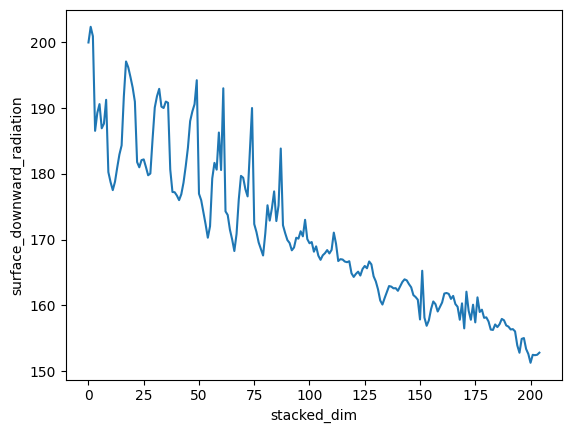

In [3]:

# Load the surface_downward_radiation NetCDF file and inspect it for any unexpected zero values
file_path = Path(data_dir_climate, filename_climate.format('surface_downward_radiation'))
da_climate = xr.load_dataset(file_path)['surface_downward_radiation']

# Checking if the entire dataset is zero
if (da_climate == 0).all():
    print("Warning: The 'surface_downward_radiation' dataset contains only zeros. Please verify the data source.")
else:
    print("The 'surface_downward_radiation' dataset contains non-zero values. Proceeding with analysis.")
    
# Display dataset information for debugging
print(da_climate)
da_climate.mean(dim='time').plot()  # Mean over time for visualization
plt.show()

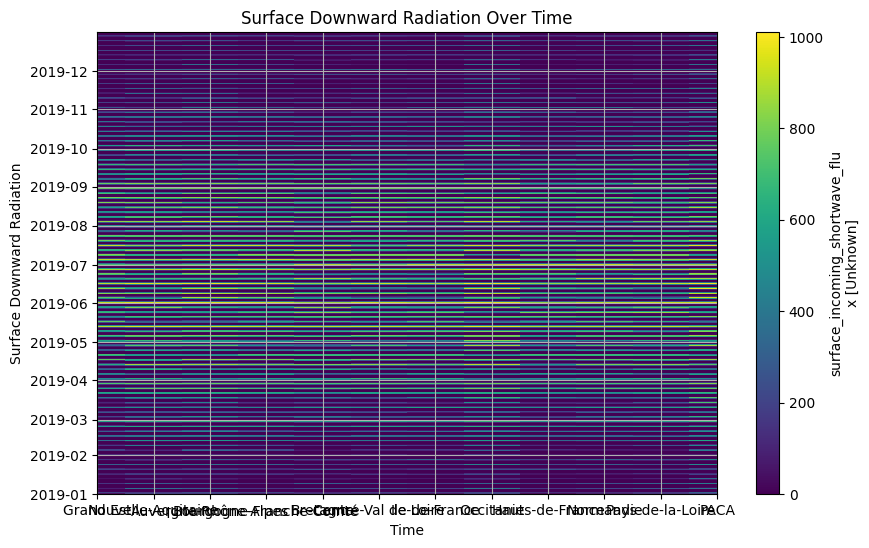

In [5]:
import matplotlib.pyplot as plt

# Plotting the 'surface_downward_radiation' variable over time, assuming `df_combined` has time-indexed data for this variable
plt.figure(figsize=(10, 6))
da_climate_reg.plot()
plt.title('Surface Downward Radiation Over Time')
plt.xlabel('Time')
plt.ylabel('Surface Downward Radiation')
plt.grid(True)
plt.show()

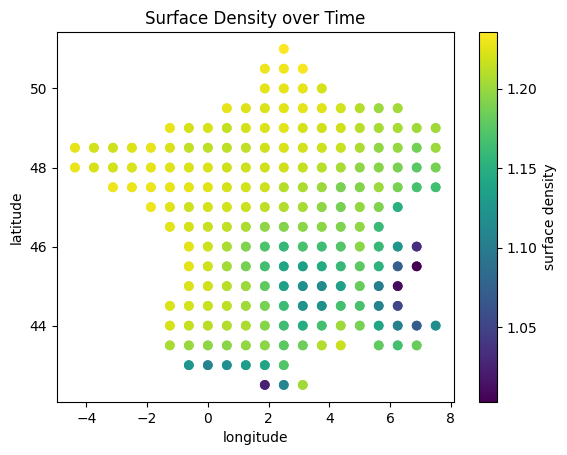

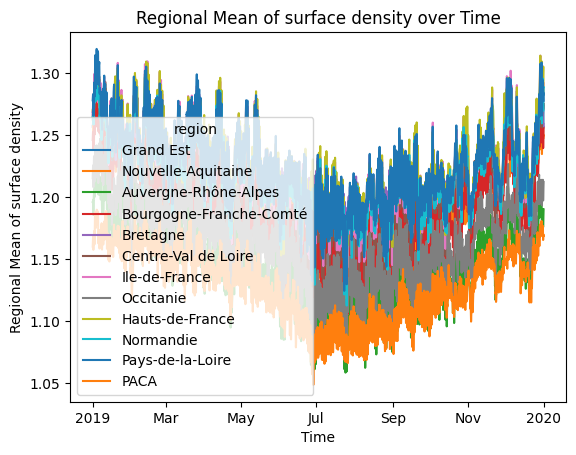

In [ ]:
# Read a climate variable and plot its mean over time
variable_name = 'surface_density'
filename = filename_climate.format(variable_name)
filepath = Path(data_dir_climate, filename)
da_climate = xr.load_dataset(filepath)[variable_name]
plt.figure()
plt.title('Surface Density over Time')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(da_mask['lon'], da_mask['lat'], c=da_climate.mean('time'))
sc_climate = plt.scatter(da_mask['lon'], da_mask['lat'], c=da_climate.mean('time'))
plt.colorbar(sc_climate, label='surface density')

# Compute regional mean of climate variable
da_climate_reg = da_climate.groupby(da_mask).mean().rename(mask='region')
da_climate_reg['region'] = ds_mask['region'].values

# Plot time series for the regional mean climate variable with 'region' as hue
plt.figure()
da_climate_reg.plot.line(x='time', hue='region')
plt.xlabel('Time')
plt.ylabel('Regional Mean of surface density')
plt.title('Regional Mean of surface density over Time')
plt.show()

In [ ]:
df_energy

,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Grand Est,Hauts-de-France,Île-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur
time,,,,,,,,,,,,
2014-01-01,0.0510,0.0480,0.0450,0.0480,0.0440,0.0350,0.0310,0.0380,0.0530,0.0570,0.0440,0.0700
2014-02-01,0.0790,0.0780,0.0810,0.0920,0.0680,0.0680,0.0640,0.0810,0.0880,0.0960,0.0860,0.0970
2014-03-01,0.1560,0.1610,0.1340,0.1730,0.1560,0.1410,0.1270,0.1320,0.1540,0.1620,0.1470,0.1770
2014-04-01,0.1740,0.1790,0.1590,0.1800,0.1690,0.1630,0.1380,0.1500,0.1740,0.1790,0.1670,0.1950
2014-05-01,0.1870,0.1950,0.1840,0.1940,0.1930,0.1740,0.1580,0.1680,0.1890,0.1980,0.1870,0.2220
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,0.1786,0.1671,0.1548,0.1725,0.1581,0.1424,0.1482,0.1502,0.1970,0.2040,0.1671,0.2230
2021-09-01,0.1520,0.1630,0.1444,0.1625,0.1682,0.1508,0.1400,0.1418,0.1640,0.1534,0.1578,0.1689
2021-10-01,0.1210,0.1242,0.1143,0.1316,0.1010,0.1007,0.1056,0.1017,0.1362,0.1341,0.1226,0.1413


In [13]:
print(df_combined.columns)


Index(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 'Île-de-France',
       'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire',
       'Provence-Alpes-Côte d'Azur', 'surface_downward_radiation_Grand Est',
       'surface_temperature_Grand Est', 'surface_specific_humidity_Grand Est',
       'surface_density_Grand Est',
       'surface_downward_radiation_Nouvelle-Aquitaine',
       'surface_temperature_Nouvelle-Aquitaine',
       'surface_specific_humidity_Nouvelle-Aquitaine',
       'surface_density_Nouvelle-Aquitaine',
       'surface_downward_radiation_Auvergne-Rhône-Alpes',
       'surface_temperature_Auvergne-Rhône-Alpes',
       'surface_specific_humidity_Auvergne-Rhône-Alpes',
       'surface_density_Auvergne-Rhône-Alpes',
       'surface_downward_radiation_Bourgogne-Franche-Comté',
       'surface_temperature_Bourgogne-Franche-Comté',
       'surface_specific_humidity_Bourgogne-Franche

In [14]:
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_regression

# Load PV energy data
df_energy = pd.read_csv('data/energy_france/reseaux_energies_capacityfactor_pv.csv', index_col=0, parse_dates=True)

# Load climate data for each variable
data_files = {
    'surface_downward_radiation': 'data/climate_france_2019/merra2_area_selection_output_surface_downward_radiation_merra2_2019-2019.nc',
    'surface_temperature': 'data/climate_france_2019/merra2_area_selection_output_surface_temperature_merra2_2019-2019.nc',
    'surface_specific_humidity': 'data/climate_france_2019/merra2_area_selection_output_surface_specific_humidity_merra2_2019-2019.nc',
    'surface_density': 'data/climate_france_2019/merra2_area_selection_output_surface_density_merra2_2019-2019.nc',
    'height_500': 'data/climate_france_2019/merra2_area_selection_output_height_500_merra2_2019-2019.nc',
    'meridional_wind': 'data/climate_france_2019/merra2_area_selection_output_meridional_wind_merra2_2019-2019.nc',
    'upper_meridional_wind': 'data/climate_france_2019/merra2_area_selection_output_upper_meridional_wind_merra2_2019-2019.nc',
    'upper_zonal_wind': 'data/climate_france_2019/merra2_area_selection_output_upper_zonal_wind_merra2_2019-2019.nc',
    'zonal_wind': 'data/climate_france_2019/merra2_area_selection_output_zonal_wind_merra2_2019-2019.nc'
}


# Read and process each climate variable to calculate its regional mean over time
climate_datasets = {}
for var, filepath in data_files.items():
    ds = xr.open_dataset(filepath)
    da_var = ds[var]
    # Assuming the mask region logic is pre-defined, e.g., in a region mask
    da_var_regional_mean = da_var.mean(dim=['stacked_dim'])  # Simplified; change as per grid
    climate_datasets[var] = da_var_regional_mean.to_dataframe(name=var)
    # Assuming `region_mask` is an xarray DataArray with the same grid as `da_var` 
# and contains binary values (1 for the region, 0 otherwise)
region_specific_mean = (da_var * region_mask).sum(dim=['lat', 'lon']) / region_mask.sum(dim=['lat', 'lon'])


# Combine all climate variables and energy data
df_climate = pd.concat(climate_datasets.values(), axis=1)
df_combined = pd.concat([df_energy, df_climate], axis=1).dropna()

# Display the first few rows of the combined dataset
df_combined.head()


ValueError: 'lat' not found in array dimensions ('time', 'stacked_dim')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of climate variables and regions
climate_variables = [
    'surface_downward_radiation', 'surface_temperature', 
    'surface_specific_humidity', 'surface_density',
    'zonal_wind', 'height_500', 'upper_zonal_wind',
    'meridional_wind', 'upper_meridional_wind'
]

regions = [
    'Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 
    'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 
    'Île-de-France', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 
    'Pays de la Loire', 'Provence-Alpes-Côte d\'Azur'
]

# Generate scatter plots for each climate variable and region combination
for climate_var in climate_variables:
    for region in regions:
        # Calculate correlation coefficient
        correlation = np.corrcoef(df_combined[climate_var], df_combined[region])[0, 1]
        
        # Create scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df_combined[climate_var], df_combined[region], alpha=0.5)
        plt.xlabel(climate_var)
        plt.ylabel(f'Capacity Factor - {region}')
        plt.title(f"{climate_var} vs Capacity Factor ({region})\nCorrelation: {correlation:.2f}")
        plt.grid(True)
        plt.show()

KeyError: 'surface_downward_radiation'

ValueError: 'lat' not found in array dimensions ('time', 'stacked_dim')

In [10]:
df_combined.tail()

,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Grand Est,Hauts-de-France,Île-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,...,surface_specific_humidity_Normandie,surface_density_Normandie,surface_downward_radiation_Pays-de-la-Loire,surface_temperature_Pays-de-la-Loire,surface_specific_humidity_Pays-de-la-Loire,surface_density_Pays-de-la-Loire,surface_downward_radiation_PACA,surface_temperature_PACA,surface_specific_humidity_PACA,surface_density_PACA
time,,,,,,,,,,,,,,,,,,,,,
2019-08-01,0.202,0.213,0.173,0.189,0.297,0.171,0.155,0.174,0.216,0.211,...,0.010264,1.199963,0.0,289.434903,0.009970,1.208789,0.0,291.879528,0.007413,1.105329
2019-09-01,0.174,0.187,0.146,0.162,0.264,0.142,0.132,0.142,0.182,0.177,...,0.008135,1.205059,0.0,288.701660,0.008840,1.210414,0.0,293.615012,0.009939,1.096628
2019-10-01,0.104,0.098,0.085,0.084,0.202,0.087,0.081,0.083,0.108,0.113,...,0.011132,1.184092,0.0,290.211448,0.011787,1.192760,0.0,289.618386,0.007024,1.111173
2019-11-01,0.061,0.062,0.059,0.054,0.121,0.055,0.052,0.056,0.057,0.074,...,0.008007,1.216425,0.0,286.715110,0.009264,1.216139,0.0,283.164706,0.007309,1.139358
2019-12-01,0.059,0.058,0.050,0.051,0.074,0.048,0.048,0.051,0.053,0.065,...,0.004196,1.259577,0.0,280.112016,0.005838,1.241756,0.0,280.411976,0.006438,1.148205


In [ ]:
import xarray as xr

# Define a function to check for NaN values in a NetCDF file
def check_nan_in_nc(filepath, variable_name):
    # Open the NetCDF file
    ds = xr.open_dataset(filepath)
    
    # Check if the variable exists in the dataset
    if variable_name in ds:
        da_var = ds[variable_name]
        
        # Check for NaN values using isnull().sum() to count the NaNs
        nan_count = da_var.isnull().sum().item()
        
        if nan_count > 0:
            print(f"Variable '{variable_name}' in '{filepath}' contains {nan_count} NaN values.")
        else:
            print(f"Variable '{variable_name}' in '{filepath}' contains no NaN values.")
    else:
        print(f"Variable '{variable_name}' not found in '{filepath}'.")

# Example usage:
# Specify the path to the NetCDF file and the variable you want to check
file_path = "data/climate_france_2019/merra2_area_selection_output_surface_downward_radiation_merra2_2019-2019.nc"
variable = "surface_downward_radiation"  # Replace with the correct variable name

# Run the NaN check function
check_nan_in_nc(file_path, variable)



Variable 'surface_downward_radiation' in 'data/climate_france_2019/merra2_area_selection_output_surface_downward_radiation_merra2_2019-2019.nc' contains no NaN values.


In [ ]:
# Count the number of zero values in the 'surface_downward_radiation' column
zero_count = (df_combined['surface_downward_radiation'] == 0).sum()
print(f"The number of zeros in 'surface_downward_radiation' column is: {zero_count}")


The number of zeros in 'surface_downward_radiation' column is: 12


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of climate variables and regions
climate_variables = [
    'surface_downward_radiation', 'surface_temperature', 
    'surface_specific_humidity', 'surface_density',
    'zonal_wind', 'height_500', 'upper_zonal_wind',
    'meridional_wind', 'upper_meridional_wind'
]

regions = [
    'Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 
    'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 
    'Île-de-France', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 
    'Pays de la Loire', 'Provence-Alpes-Côte d\'Azur'
]

# Generate scatter plots for each climate variable and region combination
for climate_var in climate_variables:
    for region in regions:
        # Filter valid data (remove NaNs)
        valid_data = df_combined[[climate_var, region]].dropna()
        
        # Calculate correlation coefficient
        correlation = np.corrcoef(valid_data[climate_var], valid_data[region])[0, 1]
        
        # Perform linear fit (polynomial of degree 1)
        slope, intercept = np.polyfit(valid_data[climate_var], valid_data[region], 1)
        
        # Print the capacity factor coefficient (slope)
        print(f"Capacity Factor Coefficient (slope) for {climate_var} and {region}: {slope:.4f}")
        
        # Create scatter plot with linear fit
        plt.figure(figsize=(8, 6))
        plt.scatter(valid_data[climate_var], valid_data[region], alpha=0.5, label='Data')
        plt.plot(valid_data[climate_var], slope * valid_data[climate_var] + intercept, 
                 color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
        plt.xlabel(climate_var)
        plt.ylabel(f'Capacity Factor - {region}')
        plt.title(f"{climate_var} vs Capacity Factor ({region})\nCorrelation: {correlation:.2f}")
        plt.legend()
        plt.grid(True)
        plt.show()


KeyError: "['surface_downward_radiation'] not in index"

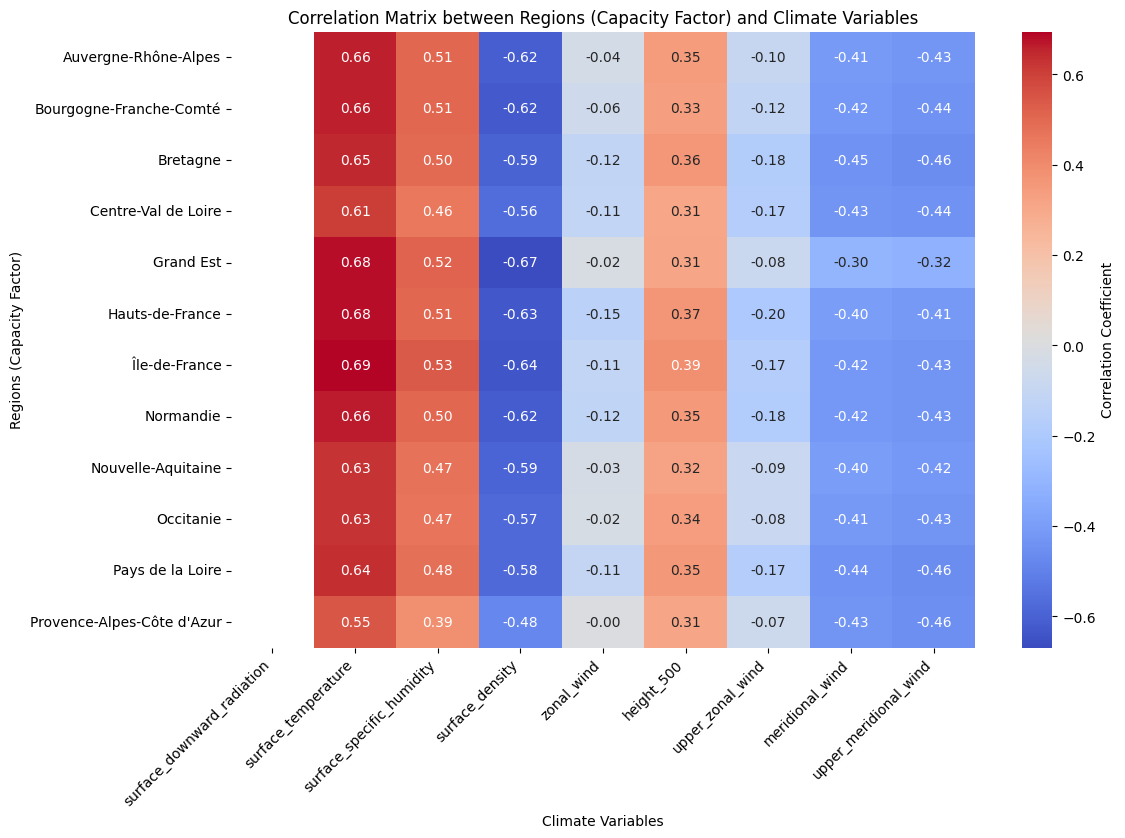

In [ ]:
import seaborn as sns  # Using seaborn for an easier heatmap visualization

# Define the list of regions and climate variables
regions = [
    'Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 
    'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 
    'Île-de-France', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 
    'Pays de la Loire', 'Provence-Alpes-Côte d\'Azur'
]

climate_variables = [
    'surface_downward_radiation', 'surface_temperature', 
    'surface_specific_humidity', 'surface_density',
    'zonal_wind', 'height_500', 'upper_zonal_wind',
    'meridional_wind', 'upper_meridional_wind'
]

# Construct the list of columns to select from df_combined
capacity_factor_columns = [f'{region}' for region in regions]
selected_columns = capacity_factor_columns + climate_variables

# Subset df_combined to only include the selected columns
df_selected = df_combined[selected_columns]

# Calculate correlation matrix only between capacity factors and climate variables
correlation_matrix = df_selected[capacity_factor_columns + climate_variables].corr().loc[capacity_factor_columns, climate_variables]

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix between Regions (Capacity Factor) and Climate Variables')
plt.xlabel('Climate Variables')
plt.ylabel('Regions (Capacity Factor)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### Analyzing the relationship between the climate variables and the capacity factor

The code below:
- does a scatter plot the demand as a function of each climate variable on separate figures,
- computes the correlation between the capacity factor and each climate variable,
- computes the correlation matrix between climate variables removing values smaller than 0.3 in absolute value.

> ***Question***
> - Does their seem to be redundancies between climate variables?
> - Which climate variables seem to be most relevant to predict the capacity factor?
> - Discuss the limits of this analysis using correlations alone.

## Ensemble Methods: 
Using Lasso Regression to find R2, bagging Regressor, Feature Importances using MDI, Choose the stacking regressor, AdaBoost regressor, and  voting regressor (compare between DecisionTree, Random Forest and Lasso in each regressor method)

## RNN 
LSTM (Long Short Term Memory) Method: Ideal for capturing long-term dependencies in weather patterns
